In [2]:
cd ..

/Users/acram/Desktop/VSCode_projects/data_stream/CALMID


In [15]:
import pandas as pd
from calmid import CALMID
from tqdm import tqdm

In [11]:
df = pd.read_csv("datasets/covertype/covtype.data.gz",compression='gzip', header=None)

label_col = df.columns[-1]
feature_cols = list(df.columns)
feature_cols.pop()
X = df[feature_cols]
Y = df[label_col]

print(f"There are {X.shape[0]} examples in the dataset with {(X.shape[1])} features and {Y.nunique()} labels ({sorted(Y.unique())})")

There are 581012 examples in the dataset with 54 features and 7 labels ([1, 2, 3, 4, 5, 6, 7])


In [17]:
calmid = CALMID(n_classes=7)
res = []

for (i,x), y in tqdm(zip(X.iterrows(), Y)):
    x = x.to_dict()
    y_hat = calmid.predict_one(x)
    calmid.learn_one(x, y)
    res.append(y_hat == y)

7227it [00:45, 157.96it/s]


KeyboardInterrupt: 

<Axes: >

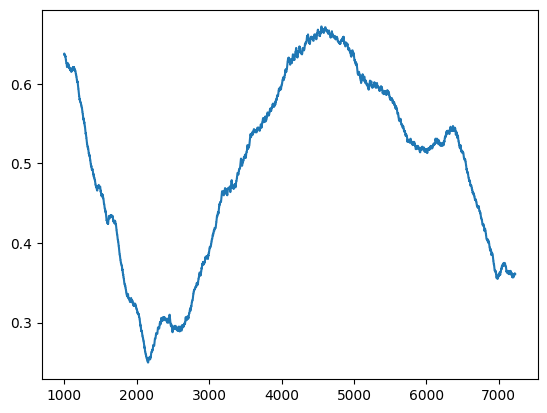

In [18]:
pd.Series(res).rolling(1000).mean().plot()